In [8]:
quit()

In [1]:
import pykat
from pykat import finesse
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
%matplotlib inline
pykat.init_pykat_plotting(dpi=90)

                                              ..-
    PyKat 1.2.1           _                  '(
                          \`.|\.__...-""""-_." )
       ..+-----.._        /  ' `            .-'
   . '            `:      7/* _/._\    \   (
  (        '::;;+;;:      `-"' =" /,`"" `) /
  L.        \`:::a:f            c_/     n_'
  ..`--...___`.  .    ,
   `^-....____:   +.      www.gwoptics.org/pykat



# Base Model
## Base model is only with amplitude detectors, no photo detectors

In [2]:
import utils_DRFPMI as utl

base = utl.model_DRFPMI()

# Field Check (POP, TMSX)

# SRC tuning

<function matplotlib.pyplot.show(*args, **kw)>

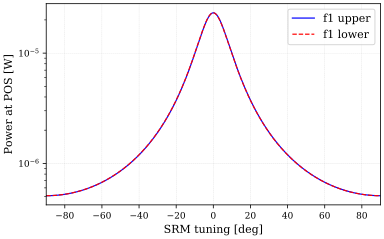

In [3]:
model, out = utl.run_sweep('SRCL', base)

plt.figure(1)
#plt.semilogy(out.x, out["CR_POS"]**2,label="Carrier") # CR => 0
plt.semilogy(out.x, out["SB1p_POS"]**2,label="f1 upper")
plt.semilogy(out.x, out["SB1m_POS"]**2,label="f1 lower",LineStyle='--')
#plt.semilogy(out.x, out["SB2p_POS"]**2,label="f2 upper")
#plt.semilogy(out.x, out["SB2m_POS"]**2,label="f2 lower",LineStyle='--')
plt.xlabel("SRM tuning [deg]")
plt.ylabel("Power at POS [W]")
plt.legend(loc=1)
plt.show

## Frequency Responses

### CARM
CARM has a pole.

<function matplotlib.pyplot.show(*args, **kw)>

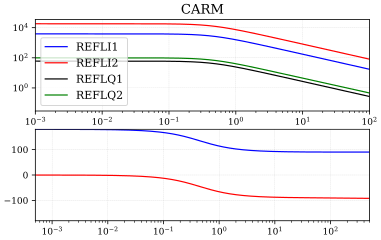

In [4]:
model,out = utl.run_fsig('CARM',base)

plt.subplot(2,1,1)
plt.loglog(out.x, np.abs(out["REFLI1"]),label="REFLI1")
plt.loglog(out.x, np.abs(out["REFLI2"]),label="REFLI2")
plt.loglog(out.x, np.abs(out["REFLQ1"]),label="REFLQ1")
plt.loglog(out.x, np.abs(out["REFLQ2"]),label="REFLQ2")
plt.xlim(0.001,100)
plt.title('CARM')
plt.legend()

plt.subplot(2,1,2)
plt.semilogx(out.x, np.angle(out["REFLI1"])*180/np.pi,label="REFLI1")
plt.semilogx(out.x, np.angle(out["REFLI2"])*180/np.pi,label="REFLI2")
plt.ylim(-180,180)

plt.show

In [7]:
### Searching pole...

print('Gain at DC is')
print(np.abs(out["REFLI1"][0]))
print('Gain at pole should be')
print(np.abs(out["REFLI1"][0])/np.sqrt(2))

print(np.abs(out["REFLI1"][264]))
print('Pole is at')
print(out.x[264])

Gain at DC is
3892.77149555314
Gain at pole should be
2752.6051221153234
2778.4741019583
Pole is at
0.436515832240166


### DARM

<function matplotlib.pyplot.show(*args, **kw)>

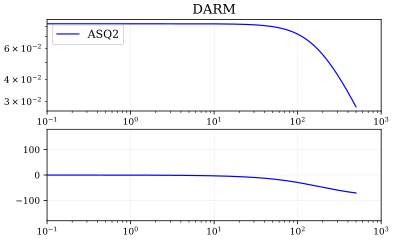

In [5]:
model, out_darm = utl.run_fsig('DARM', base)

plt.subplot(2,1,1)
plt.loglog(out_darm.x, np.abs(out_darm["ASQ2"]),label="ASQ2")
plt.xlim(0.1,1000)
plt.title('DARM')
plt.legend()

plt.subplot(2,1,2)
plt.semilogx(out_darm.x, np.angle(out_darm["ASQ2"])*180/np.pi,label="ASQ2")
plt.xlim(0.1,1000)
plt.ylim(-180,180)

plt.show

In [69]:
### Searching pole...

print('Gain at DC is')
print(np.abs(out_darm["ASQ2"][0]))
print('Gain at pole should be')
print(np.abs(out_darm["ASQ2"][0])/np.sqrt(2))

print(np.abs(out_darm["ASQ2"][651]))
print('Pole is at')
print(out_darm.x[651])

Gain at DC is
0.082916066053766
Gain at pole should be
0.05863051257592963
0.0584946602511422
Pole is at
179.887091512879


### PRCL

PRCL has a set of zero-pole. The pole frequency should be compared with the analytical prediction. 

<function matplotlib.pyplot.show(*args, **kw)>

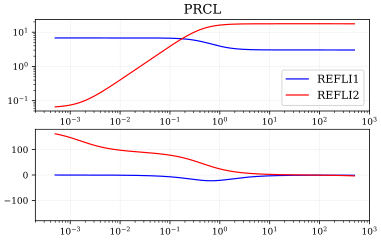

In [6]:
model, out_prcl = utl.run_fsig('PRCL',base)

plt.subplot(2,1,1)
plt.loglog(out_prcl.x, np.abs(out_prcl["REFLI1"]),label="REFLI1")
plt.loglog(out_prcl.x, np.abs(out_prcl["REFLI2"]),label="REFLI2")
plt.xlim(0.0002,1000)
plt.title('PRCL')
plt.legend()

plt.subplot(2,1,2)
plt.semilogx(out_prcl.x, np.angle(out_prcl["REFLI1"])*180/np.pi,label="REFLI1")
plt.semilogx(out_prcl.x, np.angle(out_prcl["REFLI2"])*180/np.pi,label="REFLI2")

plt.xlim(0.0002,1000)
plt.ylim(-180,180)

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

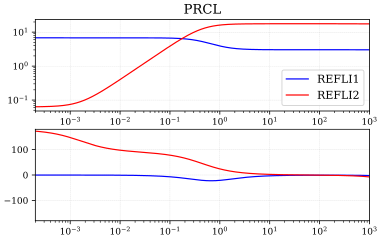

In [234]:
PRCL = base.deepcopy()
PRCL.parse("""
const fsb1 16.881M
const fsb2 45.0159M
fsig sig1 PRM 10 0
xaxis sig1 f log .0001 10000 5000

pd2 REFLI1 $fsb1 0 10 nREFL
pd2 REFLI2 $fsb2 0 10 nREFL

put REFLI1 f2 $x1
put REFLI2 f2 $x1

yaxis lin abs:deg
""")

out_prcl = PRCL.run()

plt.subplot(2,1,1)
plt.loglog(out_prcl.x, np.abs(out_prcl["REFLI1"]),label="REFLI1")
plt.loglog(out_prcl.x, np.abs(out_prcl["REFLI2"]),label="REFLI2")
plt.xlim(0.0002,1000)
plt.title('PRCL')
plt.legend()

plt.subplot(2,1,2)
plt.semilogx(out_prcl.x, np.angle(out_prcl["REFLI1"])*180/np.pi,label="REFLI1")
plt.semilogx(out_prcl.x, np.angle(out_prcl["REFLI2"])*180/np.pi,label="REFLI2")

plt.xlim(0.0002,1000)
plt.ylim(-180,180)

plt.show

In [28]:
### Searching pole...

print('Gain at DC is')
print(np.abs(out_prcl["REFLI1"][0]))
print('Gain at pole should be')
print(np.abs(out_prcl["REFLI1"][0])/np.sqrt(2))

print(np.abs(out_prcl["REFLI1"][510]))
print('Pole is at')
print(out_prcl.x[510])

Gain at DC is
6.82067100871652
Gain at pole should be
4.822942722505941
4.81576865638693
Pole is at
0.574076810748441


In [39]:
### Searching zero...

print('Gain at High freq is')
print(np.abs(out_prcl["REFLI1"][1000]))
print('Gain at zero should be')
print(np.abs(out_prcl["REFLI1"][1000])*np.sqrt(2))

print(np.abs(out_prcl["REFLI1"][532]))
print('Zero is at')
print(out_prcl.x[532])

Gain at High freq is
3.02993235250969
Gain at zero should be
4.284971425992222
4.28755331704262
Zero is at
0.777982815802537


In [212]:
### Searching pole...

print('Gain at High freq is')
print(np.abs(out_prcl["REFLI2"][5000]))
print('Gain at zero should be')
print(np.abs(out_prcl["REFLI2"][5000])/np.sqrt(2))

print(np.abs(out_prcl["REFLI2"][2220]))
print('Pole is at')
print(out_prcl.x[2220])

Gain at High freq is
15.6408368341119
Gain at zero should be
11.059741788832856
11.0654724934498
Pole is at
0.356451133426245


In [231]:
### Searching zero...

print('Gain at High freq is')
print(np.abs(out_prcl["REFLI2"][0]))
print('Gain at zero should be')
print(np.abs(out_prcl["REFLI2"][0])*np.sqrt(2))

print(np.abs(out_prcl["REFLI2"][750]))
print('Zero is at')
print(out_prcl.x[750])

Gain at High freq is
0.062988244409885
Gain at zero should be
0.08907882951453067
0.0890310484128153
Zero is at
0.00158489319246112


## Demod phase tuning

### Mthod1 (ex PRCL)

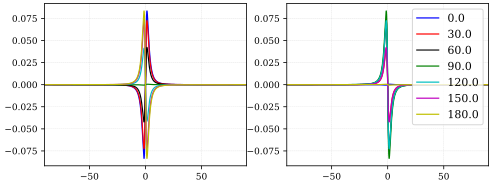

In [6]:
model = base.deepcopy()

model, out = utl.run_sweep('PRCL', model)

# Plot in different subplots
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(8,3))

for pp in np.linspace(0,180,7):
    model.REFLI1.phase1 = pp
    model.REFLQ1.phase1 = pp+90
    out = model.run()
    ax1.plot(out.x, out["REFLI1"],label=pp)
    ax2.plot(out.x, out["REFLQ1"],label=pp)

plt.legend(loc=1)
plt.show()




## Method 2 

DARM
AS2


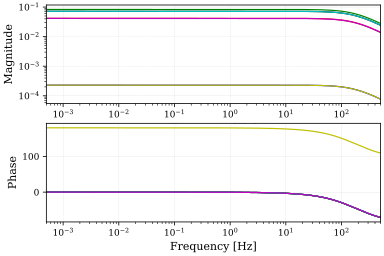

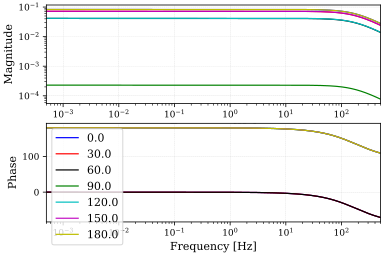

In [9]:
###### Run ######
DoF = "DARM"
sb = "2"
model,out = utl.run_fsig(DoF, base)
sens = "AS"
################
sensI = sens+"I"+sb
sensQ = sens+"Q"+sb

# Plot in different subplot
fig1, (ax1, ax2) = plt.subplots(2,1,figsize=(6,4))
fig2, (ax3, ax4) = plt.subplots(2,1,figsize=(6,4))

for pp in np.linspace(0,180,7):
    setI = "model."+sensI+".phase1 = pp"
    setQ = "model."+sensQ+".phase1 = pp+90"
    exec(setI)
    exec(setQ)
    out = model.run()
    ax1.loglog(out.x, np.abs(out[sensI]),label=pp)
    ax2.semilogx(out.x, np.angle(out[sensI])*180/np.pi,label=pp)
    ax3.loglog(out.x, np.abs(out[sensQ]),label=pp)
    ax4.semilogx(out.x, np.angle(out[sensQ])*180/np.pi,label=pp)

plt.legend()
ax1.set(xlabel='Frequency [Hz]', ylabel='Magnitude')
ax2.set(xlabel='Frequency [Hz]', ylabel='Phase')
ax3.set(xlabel='Frequency [Hz]', ylabel='Magnitude')
ax4.set(xlabel='Frequency [Hz]', ylabel='Phase')
print(DoF)
print(sens+sb)
plt.show()



In [3]:
###### Run ######
model,out = utl.run_fsig("DARM", base)
################

dummy, demod_REFL1 = utl.demod_phase(out,"REFL","1",0)
dummy, demod_POP1 = utl.demod_phase(out,'POP','1',0)
dummy, demod_POS1 = utl.demod_phase(out,'POS','1',0)
dummy, demod_AS1 = utl.demod_phase(out,'AS','1',0)

dummy, demod_REFL2 = utl.demod_phase(out,"REFL","2",0)
dummy, demod_POP2 = utl.demod_phase(out,'POP','2',0)
dummy, demod_POS2 = utl.demod_phase(out,'POS','2',0)
dummy, demod_AS2 = utl.demod_phase(out,'AS','2',0)

print(demod_REFL1)
print(demod_POP1)
print(demod_POS1)
print(demod_AS1)

print(demod_REFL2)
print(demod_POP2)
print(demod_POS2)
print(demod_AS2)



89.79210125216409
-29.025771217609254
-29.058255404884825
89.76390840018325
-89.23288975481483
11.786744206910194
12.983960862424274
89.84129417399141


# Seinging Matrix
## Radar plots (my favorite...)

<function matplotlib.pyplot.show(*args, **kw)>

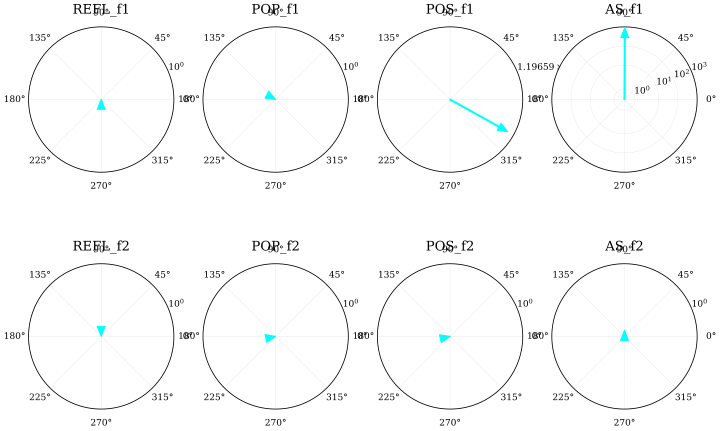

In [5]:
ports = ['REFL','POP','POS','AS']

######## Plot Setting #########################
fig = plt.figure(figsize=(12,8))
#fig = plt.figure()

a = dict(shrink=0, width=1, headwidth=8, 
            headlength=10, connectionstyle='arc3',
            facecolor='cyan', edgecolor='cyan')

###### Computing the signal and plot ##########
DoF = "DARM"
model,out = utl.run_fsig(DoF, base)
################################################

############## Plotting Radar ##################

ax1 = fig.add_subplot(241, polar=True)
r, demod = utl.demod_phase(out, 'REFL', '1', 0)
ax1.annotate('', xy=(np.pi/180*demod,r), xytext=[0,0], arrowprops=a, label='test')
ax1.set_title('REFL_f1')
if r > 1:
    ax1.set_rlim([0,r*1.1])
else:
    ax1.set_rlim([0,1])
ax1.set_rscale('symlog')

#-----------------------------------------------
ax2 = fig.add_subplot(242, polar=True)
r, demod = utl.demod_phase(out, 'POP', '1', 0)
ax2.annotate('', xy=(np.pi/180*demod,r), xytext=[0,0], arrowprops=a, label='test')
ax2.set_title('POP_f1')
if r > 1:
    ax2.set_rlim([0,r*1.1])
else:
    ax2.set_rlim([0,1])
ax2.set_rscale('symlog')

#-----------------------------------------------
ax3 = fig.add_subplot(243, polar=True)
r, demod = utl.demod_phase(out, 'POS', '1', 0)
ax3.annotate('', xy=(np.pi/180*demod,r), xytext=[0,0], arrowprops=a, label='test')
ax3.set_title('POS_f1')
if r > 1:
    ax3.set_rlim([0,r*1.1])
else:
    ax3.set_rlim([0,1])
ax3.set_rscale('symlog')


#-----------------------------------------------
ax4 = fig.add_subplot(244, polar=True)
r, demod = utl.demod_phase(out, 'AS', '1', 0)
ax4.annotate('', xy=(np.pi/180*demod,r), xytext=[0,0], arrowprops=a, label='test')
ax4.set_title('AS_f1')
if r > 1:
    ax4.set_rlim([0,r*1.1])
else:
    ax4.set_rlim([0,1])
ax4.set_rscale('symlog')

#-----------------------------------------------
ax5 = fig.add_subplot(245, polar=True)
r, demod = utl.demod_phase(out, 'REFL', '2', 0)
ax5.annotate('', xy=(np.pi/180*demod,r), xytext=[0,0], arrowprops=a, label='test')
ax5.set_title('REFL_f2')
if r > 1:
    ax5.set_rlim([0,r*1.1])
else:
    ax5.set_rlim([0,1])
ax5.set_rscale('symlog')

#-----------------------------------------------
ax6 = fig.add_subplot(246, polar=True)
r, demod = utl.demod_phase(out, 'POP', '2', 0)
ax6.annotate('', xy=(np.pi/180*demod,r), xytext=[0,0], arrowprops=a, label='test')
ax6.set_title('POP_f2')
if r > 1:
    ax6.set_rlim([0,r*1.1])
else:
    ax6.set_rlim([0,1])
ax6.set_rscale('symlog')

#-----------------------------------------------
ax7 = fig.add_subplot(247, polar=True)
r, demod = utl.demod_phase(out, 'POS', '2', 0)
ax7.annotate('', xy=(np.pi/180*demod,r), xytext=[0,0], arrowprops=a, label='test')
ax7.set_title('POS_f2')
if r > 1:
    ax7.set_rlim([0,r*1.1])
else:
    ax7.set_rlim([0,1])
ax7.set_rscale('symlog')


#-----------------------------------------------
ax8 = fig.add_subplot(248, polar=True)
r, demod = utl.demod_phase(out, 'AS', '2', 0)
ax8.annotate('', xy=(np.pi/180*demod,r), xytext=[0,0], arrowprops=a, label='test')
ax8.set_title('AS_f2')
if r > 1:
    ax8.set_rlim([0,r*1.1])
else:
    ax8.set_rlim([0,1])
ax8.set_rscale('symlog')

plt.show

## Radar practice

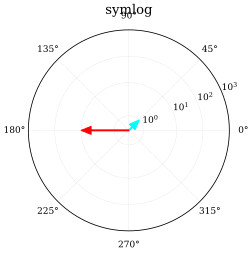

In [120]:
fig=plt.figure()
t = fig.add_subplot(111, polar=True)
r0 = 1
t.annotate('', xy=(np.pi/4, r0), xytext=[0,0], arrowprops=a, label='test')
t.annotate('', xy=(np.pi, 10*r0), xytext=[0,0], arrowprops= dict(shrink=0, width=1, headwidth=8, 
            headlength=10, connectionstyle='arc3',
            facecolor='red', edgecolor='red'), label='test')

plt.title('test')
t.set_rlim([0,1000])
t.set_rscale('symlog')
t.set_title('symlog')
plt.show()
#plt.yscale('log')

## Multiple plot practice

//miniconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:37: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


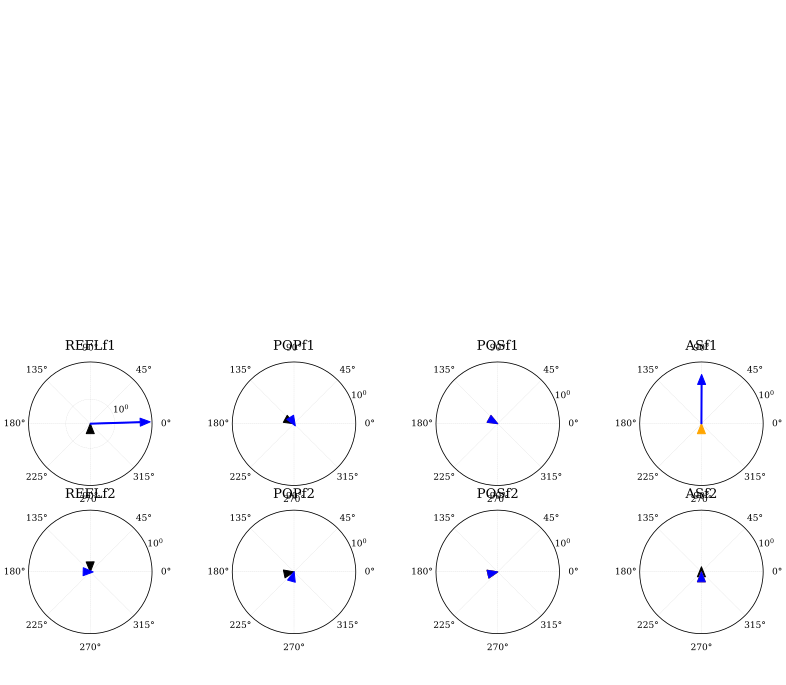

In [72]:
###### Computing the signal and plot ##########

# Specify figure size
fig = plt.figure(figsize=(14,5))
color = ['black','orange','blue']
# Specify signal ports
ports = ['REFL','POP','POS','AS']

# Specify subplot configuration
subplotnum = [2, 4]

# There should be port x 2 axes 
ax = ['ax1','ax2','ax3','ax4','ax5','ax6','ax7','ax8']

# Specify DoF to plot
DoF = ['DARM','CARM','MICH']





for jj in range(len(DoF)):
    model,out = utl.run_fsig(DoF[jj], base)


######## Plot Setting #########################

    a = dict(shrink=0, width=1, headwidth=8, 
                headlength=10, connectionstyle='arc3',
                facecolor = color[jj], edgecolor = color[jj])


############## Plotting Radar ##################
    for ii in range(len(ax)):
        #print(ii)
        #print(len(ax))
        ax[ii] = fig.add_subplot(subplotnum[0],subplotnum[1],ii+1, polar=True)
        if ii < len(ports):
            r, demod = utl.demod_phase(out, ports[ii], '1', 0)
            ax[ii].set_title(ports[ii]+'f'+'1')
        else:
            r, demod = utl.demod_phase(out, ports[ii-4], '2', 0)
            ax[ii].set_title(ports[ii-4]+'f'+'2')
            
        ax[ii].annotate('', xy=(np.pi/180*demod,r), xytext=[0,0], arrowprops=a, label='test')
        ax[ii].set_rscale('symlog')
        if r > 1:
            ax[ii].set_rlim([0,r*1.1])
        else:
            ax[ii].set_rlim([0,1])



In [ ]:
ax1 = fig.add_subplot(241, polar=True)
r, demod = utl.demod_phase(out, 'REFL', '1', 0)
ax1.annotate('', xy=(np.pi/180*demod,r), xytext=[0,0], arrowprops=a, label='test')
ax1.set_title('REFL_f1')
if r > 1:
    ax1.set_rlim([0,r*1.1])
else:
    ax1.set_rlim([0,1])
ax1.set_rscale('symlog')

In [ ]:
# Memo 

# Make for loop to plot all the DoF - Something wrong
# Radar needs in log, < 1 doesn't work well




In [30]:
ax = ['ax1','ax2','ax3']

for ii in range(len(ax)):
    print(ii)
    print(ax[ii])
    ax[ii]=100+ii
    print(ax[ii])

0
ax1
100
1
ax2
101
2
ax3
102
